# EDA Individual Project

## "Has social media influenced Spanish society's opinion on feminism (or anti-feminism)?"

## Index
- [Influencers initial dataset](#influencers-initial-dataset)
- [Influencers content dataset](#influencers-content-dataset)
- [Codebook - Feminism and Anti-feminism](#codebook)

In [82]:
#pip install pandas openpyxl
import pandas as pd
import json

## Influencers initial dataset

In [110]:
path_file_influencers = r"C:\Users\Celeste\Google Drive Streaming\My Drive\_CODEOP\_Individual project\influencers_data\Influencers Initial Dataset.xlsx"

df_influencers = pd.read_excel(path_file_influencers)

df_influencers.head(9)

,id,influencer's name,real name,age,ref. edad,education,ref. educacion,previous_occupation,ref. ocupacion,main platform,secondary platform,# follower,link_plataforma
0,1,Ibai Llanos,Ibai Llanos Garatea,28,Ibai Llanos - Wikiwand,4,https://www.wikiwand.com/es/Ibai_Llanos,Narrador esports,▷ Ibai Llanos Wiki ≫ Biografía de este Influen...,Twitch,Youtube,"12,8M",ibai - Twitch
1,2,Maria Pombo,María Pombo,28,https://www.modelocurriculum.net/biografias/in...,4,https://www.modelocurriculum.net/biografias/in...,NaN,NaN,Instagram,NaN,"2,9M",https://www.instagram.com/mariapombo/
2,3,Naim Darrechi,Naim Darrechi,20,https://historia-biografia.com/naim-darrechi/,NaN,NaN,-,-,TikTok,Instagram,29M,https://www.tiktok.com/@naimdarrechi?lang=es
3,4,Jordi Wild,Jordi Carrillo de Albornoz Torres,38,▷ Jordi Wild Wiki ≫ Biografía de este Influenc...,6,▷ Jordi Wild Wiki ≫ Biografía de este Influenc...,-,NaN,YouTube,Twitter,"3,59M",The Wild Project - YouTube
4,5,Iker Unzu,Iker Unzueta Ramos,18,"Iker Unzu - Edad, Familia, Biografía | Famous ...",3,Iker Unzu | Wiki YouTube Pedia | Fandom,-,-,TikTok,YouTube,"11,4M",Iker Unzu (@ikerunzu) oficial | TikTok
5,6,ElRubius,Rubén Doblas Gundersen,33,https://es.wikipedia.org/wiki/El_Rubius,5,https://es.wikipedia.org/wiki/El_Rubius,Dependiente,https://es.wikipedia.org/wiki/El_Rubius,YouTube,Twitch,"40,4M",https://www.youtube.com/@elrubiusOMG/videos
6,7,Samantha Hudosn,(nombre de nacimiento): Iván González Ranedo,23,"Samantha Hudson - Wikipedia, la enciclopedia l...",4,"Samantha Hudson - Wikipedia, la enciclopedia l...",Artista,"Samantha Hudson - Wikipedia, la enciclopedia l...",Instagram,Twitter,308K,Samantha Hudson (@badbixsamantha) • Fotos y vi...
7,8,Roma Gallardo,Alfonso Gallardo,34,https://youtube.fandom.com/es/wiki/Roma_Gallardo,NaN,NaN,-,-,YouTube,Twitter,"1,75M",https://www.youtube.com/@romagallardo7504
8,9,DalasReview,Daniel José Santomé Lemus,26,https://twitter.com/DalasReview?ref_src=twsrc%...,4,Dalas Review | Biblioteca Virtual Fandom | Fandom,-,-,YouTube,Twitter,"10,5M",NaN


In [111]:
df_influencers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   26 non-null     int64 
 1   influencer's name    26 non-null     object
 2   real name            26 non-null     object
 3   age                  26 non-null     int64 
 4   ref. edad            25 non-null     object
 5   education            23 non-null     object
 6   ref. educacion       23 non-null     object
 7   previous_occupation  25 non-null     object
 8   ref. ocupacion       24 non-null     object
 9   main platform        26 non-null     object
 10  secondary platform   24 non-null     object
 11  # follower           26 non-null     object
 12  link_plataforma      25 non-null     object
dtypes: int64(2), object(11)
memory usage: 2.8+ KB


In [112]:
df_influencers.shape

(26, 13)

In [113]:
df_influencers['influencer\'s name'].unique()

array(['Ibai Llanos', 'Maria Pombo', 'Naim Darrechi', 'Jordi Wild',
       'Iker Unzu', 'ElRubius', 'Samantha Hudosn', 'Roma Gallardo',
       'DalasReview', 'Sindy Takanashi', 'Dulceida', 'IlloJuan',
       'Laura Escanes', 'Violeta Mangriñan', 'Ines Hernand',
       'Angel Martín', 'Verdeliss', 'Vecinarubia', 'Ratolina', 'Grefg',
       'Victoria Martín', 'Andrea Compton', 'Carolina Iglesias',
       'Lola Lolita', 'Djmariio', 'Jaime Altozano'], dtype=object)

In [114]:
df_influencers.isna().sum()

id                     0
influencer's name      0
real name              0
age                    0
ref. edad              1
education              3
ref. educacion         3
previous_occupation    1
ref. ocupacion         2
main platform          0
secondary platform     2
# follower             0
link_plataforma        1
dtype: int64

In [115]:
df_influencers['link_plataforma']

0                                         ibai - Twitch
1                 https://www.instagram.com/mariapombo/
2          https://www.tiktok.com/@naimdarrechi?lang=es
3                            The Wild Project - YouTube
4                Iker Unzu (@ikerunzu) oficial | TikTok
5           https://www.youtube.com/@elrubiusOMG/videos
6     Samantha Hudson (@badbixsamantha) • Fotos y vi...
7             https://www.youtube.com/@romagallardo7504
8                                                   NaN
9             https://www.instagram.com/sindytakanashi/
10    Aida Domenech (@dulceida) • Fotos y videos de ...
11            https://www.youtube.com/@IlloJuan_/videos
12              https://www.instagram.com/lauraescanes/
13                   https://www.instagram.com/violeta/
14               https://www.instagram.com/ineshernand/
15                https://www.youtube.com/@angel_martin
16    verdeliss | Estefi Unzu (@verdeliss) • Fotos y...
17    La Vecina Rubia (@lavecinarubia) • Fotos y

In [116]:
df_influencers.columns

Index(['id', 'influencer's name', 'real name', 'age', 'ref. edad', 'education',
       'ref. educacion', 'previous_occupation', 'ref. ocupacion',
       'main platform', 'secondary platform', '# follower', 'link_plataforma'],
      dtype='object')

In [117]:
df_influencers['ref. ocupacion'].unique()

array(['▷ Ibai Llanos Wiki ≫ Biografía de este Influencer【2023】 (mejorinfluencer.com)',
       nan, '-', 'https://es.wikipedia.org/wiki/El_Rubius',
       'Samantha Hudson - Wikipedia, la enciclopedia libre',
       'https://www.flooxernow.com/noticias/sindy-takanashi-el-feminismo-me-hizo-darme-cuenta-de-que-habia-sido-violada-durante-ano-y-medio_201806265b3291ee0cf25c12398dc42e.html',
       'Biografía de Aida Domènech, Dulceida (modelocurriculum.net)',
       'https://es.wikipedia.org/wiki/Laura_Escanes',
       'https://andreampds.com/violeta-mangrinan-wikipedia/#:~:text=Violeta%20Mangri%C3%B1%C3%A1n%20naci%C3%B3%20en%20Valencia,Violeta%20mide%201%2C68%20metros.',
       'https://es.wikipedia.org/wiki/In%C3%A9s_Hernand',
       'Ángel Martín - Wikipedia, la enciclopedia libre',
       '¿Quién es Verdeliss? Edad de la influencer, hijos, casa, estado de salud - Legit.ng',
       'https://es.wikipedia.org/wiki/Victoria_Mart%C3%ADn',
       'Carolina Iglesias - Wikipedia, la enciclopedi

In [118]:
#remove columns 

df_influencers = df_influencers.drop(['id','real name', 'ref. edad', 'education','ref. educacion', 'previous_occupation', 'ref. ocupacion','link_plataforma'], axis = 1)

In [119]:
df_influencers

,influencer's name,age,main platform,secondary platform,# follower
0,Ibai Llanos,28,Twitch,Youtube,"12,8M"
1,Maria Pombo,28,Instagram,NaN,"2,9M"
2,Naim Darrechi,20,TikTok,Instagram,29M
3,Jordi Wild,38,YouTube,Twitter,"3,59M"
4,Iker Unzu,18,TikTok,YouTube,"11,4M"
5,ElRubius,33,YouTube,Twitch,"40,4M"
6,Samantha Hudosn,23,Instagram,Twitter,308K
7,Roma Gallardo,34,YouTube,Twitter,"1,75M"
8,DalasReview,26,YouTube,Twitter,"10,5M"
9,Sindy Takanashi,30,Instagram,NaN,264K


In [120]:
df_influencers.describe() #age

,age
count,26.000000
mean,29.807692
std,6.026735
min,18.000000
25%,26.500000
50%,29.500000
75%,33.000000
max,45.000000


In [121]:
df_influencers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   influencer's name   26 non-null     object
 1   age                 26 non-null     int64 
 2   main platform       26 non-null     object
 3   secondary platform  24 non-null     object
 4   # follower          26 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


In [122]:
df_influencers.rename(columns={'# follower': 'followers'}, inplace=True)

In [123]:
df_influencers['followers']

0     12,8M
1      2,9M
2       29M
3     3,59M
4     11,4M
5     40,4M
6      308K
7     1,75M
8     10,5M
9      264K
10     3,2M
11    1,53M
12     1,9M
13     2,2M
14     468K
15     207K
16     1,5M
17     2,8M
18    1,36M
19    17,9M
20     323K
21     699K
22     166K
23    10,2M
24    8,71M
25    3,23M
Name: followers, dtype: object

In [124]:
df_influencers['followers'] = df_influencers['followers'].apply(lambda x: float(x.replace('M', '').replace('K', '').replace(',', '.')) * 1e6)

In [125]:
df_influencers['followers']

0      12800000.0
1       2900000.0
2      29000000.0
3       3590000.0
4      11400000.0
5      40400000.0
6     308000000.0
7       1750000.0
8      10500000.0
9     264000000.0
10      3200000.0
11      1530000.0
12      1900000.0
13      2200000.0
14    468000000.0
15    207000000.0
16      1500000.0
17      2800000.0
18      1360000.0
19     17900000.0
20    323000000.0
21    699000000.0
22    166000000.0
23     10200000.0
24      8710000.0
25      3230000.0
Name: followers, dtype: float64

In [126]:
df_influencers['followers'].dtype

dtype('float64')

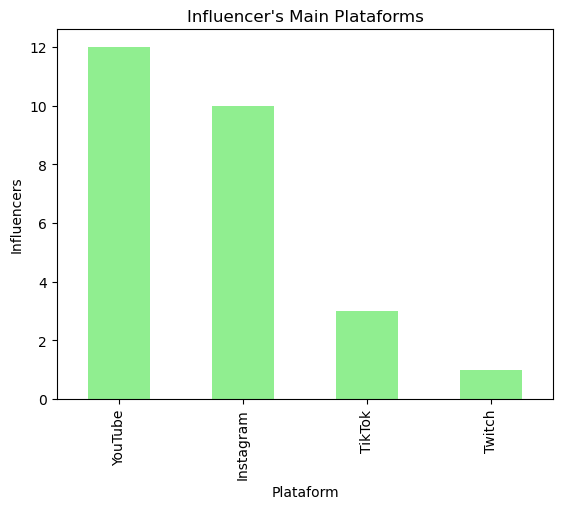

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Barchart of main platforms
df_influencers['main platform'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Influencer\'s Main Plataforms')
plt.xlabel('Plataform')
plt.ylabel('Influencers')
plt.show()

In [129]:
df_influencers['followers'].unique

<bound method Series.unique of 0      12800000.0
1       2900000.0
2      29000000.0
3       3590000.0
4      11400000.0
5      40400000.0
6     308000000.0
7       1750000.0
8      10500000.0
9     264000000.0
10      3200000.0
11      1530000.0
12      1900000.0
13      2200000.0
14    468000000.0
15    207000000.0
16      1500000.0
17      2800000.0
18      1360000.0
19     17900000.0
20    323000000.0
21    699000000.0
22    166000000.0
23     10200000.0
24      8710000.0
25      3230000.0
Name: followers, dtype: float64>

In [130]:
print(df_influencers[['age', 'followers']].head())


   age   followers
0   28  12800000.0
1   28   2900000.0
2   20  29000000.0
3   38   3590000.0
4   18  11400000.0


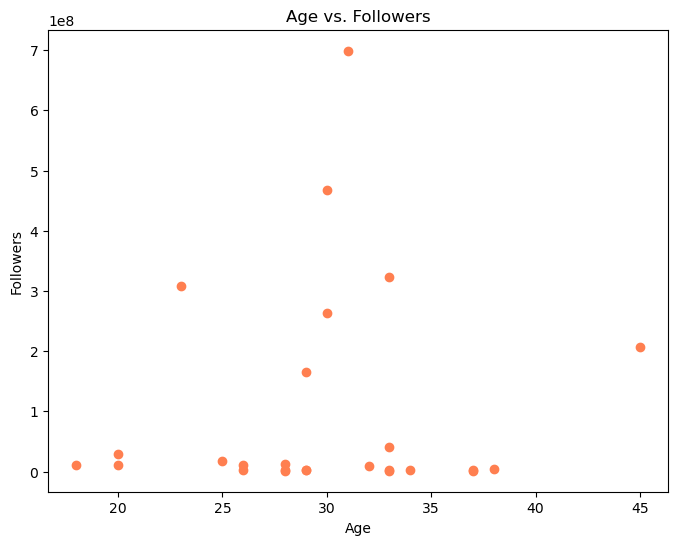

In [128]:
# Scatterplot age vs. follower
plt.figure(figsize=(8, 6))
plt.scatter(df_influencers['age'], df_influencers['followers'], color='coral')
plt.title('Age vs. Followers')
plt.xlabel('Age')
plt.ylabel('Followers')
plt.show()

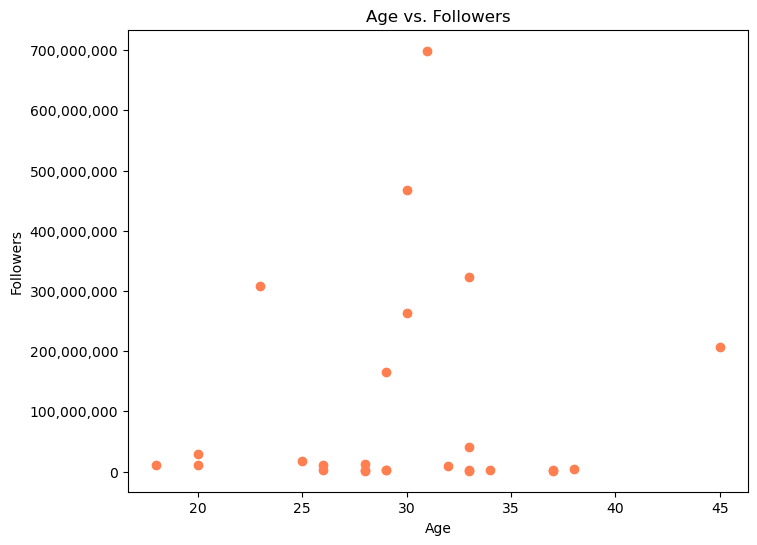

In [140]:
import matplotlib.ticker as ticker

plt.figure(figsize=(8, 6))
plt.scatter(df_influencers['age'], df_influencers['followers'], color='coral')
plt.title('Age vs. Followers')
plt.xlabel('Age')
plt.ylabel('Followers')

#  Formato de  ejes
ax = plt.gca()  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # formato sin notación científica
plt.show()


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# correlación
correlation, _ = pearsonr(df_influencers['age'], df_influencers['followers'])
print(f'Correlación entre edad y número de seguidores: {correlation:.2f}')


Correlación entre edad y número de seguidores: 0.09


## Influencers content dataset

In [103]:
path_file_content = r"C:\Users\Celeste\Google Drive Streaming\My Drive\_CODEOP\_Individual project\influencers_data\Influencers Content Analysis (September 22nd - December 22nd).xlsx"

df = pd.read_excel(path_file_content)

df.head()

,Influencer's Name,Week,Codification,Main phrase or publication,Time Stamp,Social Media Platform,Link,General description of the content (in Spanish),# Publication in this week,Views/Likes
0,Andrea Compton,19 Septiembre - 25 Septiembre,98,Sin contenido,NaN,Youtube,NaN,NaN,NaN,NaN
1,Andrea Compton,26 Septiembre - 2 Octubre,34,LAS MEJORES ESCENAS DE JUEGO DE TRONOS | Andre...,NaN,Youtube,https://www.youtube.com/watch?v=sO7idHTgtPE&ab...,Video de Andrea Compton comentando las escenas...,1.0,7500
2,Andrea Compton,3 Octubre - 9 Octubre,35,HABLEMOS DE LANA DEL REY | Andrea Compton,NaN,Youtube,https://www.youtube.com/watch?v=n-Ytp6PARis&ab...,Video de Andrea Compton hablando de la vida de...,1.0,15000
3,Andrea Compton,10 Octubre - 17 Octubre,98,Sin contenido,NaN,Youtube,NaN,NaN,NaN,NaN
4,Andrea Compton,17 Octubre - 23 Octubre,34,REPASANDO THE WALKING DEAD (LAS 11 TEMPORADAS)...,NaN,Youtube,https://www.youtube.com/watch?v=H7HJtE1L_zE&ab...,Video de Andrea Compton comentando 'The walkin...,1.0,10000


In [104]:
df.shape

(364, 10)

In [105]:
df['General description of the content (in Spanish)'][37]

'Video de Carolina Iglesias entrevistando a Maxi Iglesias hablando de la amistad como tema central'

## Feminism and Anti-feminism Codebook

In [106]:
path_file_codebook = r"C:\Users\Celeste\Google Drive Streaming\My Drive\_CODEOP\_Individual project\influencers_data\Codebook - Feminism and Anti-feminism.xlsx"

df_codebook = pd.read_excel(path_file_codebook)

df_codebook.head()

,ID,Code,Definition,Survey question / comments,Category,Sub-category,Feminism Stance
0,1,Equating feminism and machismo,"They do not deny discrimination against women,...","""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit,Strongly opposing feminism
1,2,Denying the necessity of feminism,Emphasizing equality as the real goal and impl...,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit,Moderatedly opposing feminism
2,3,Minimizing gender inequality at the workplace,Skepticism about gender inequality in the work...,"""Las mujeres exageran los problemas que tienen...",Antifeminism,Latent,Opposing feminist issues
3,4,Supporting paternalistic behaviours,Defending the persistence of paternalistic beh...,"""Los hombres deberían proteger a las mujeres """,Antifeminism,Latent,Opposing feminist issues
4,5,Minimizing Sexual Harassment,Accusing women of overreacting to flirting or ...,"""Actualmente las mujeres malinterpretan cualqu...",Antifeminism,Latent,Opposing feminist issues


In [107]:
df_codebook['Category'].value_counts() #noy balanced

Category
Non-related content    19
Antifeminism           18
Feminism                9
Neutral                 1
No content              1
Name: count, dtype: int64

In [108]:
df_codebook['Category'].value_counts().sum()

48